## **1. Explore the Dataset**

In [0]:
# Load the data
df = spark.table("hr_emp")

In [0]:
# Data types
df.dtypes

[('Age', 'bigint'),
 ('Attrition', 'string'),
 ('BusinessTravel', 'string'),
 ('DailyRate', 'bigint'),
 ('Department', 'string'),
 ('DistanceFromHome', 'bigint'),
 ('Education', 'bigint'),
 ('EducationField', 'string'),
 ('EmployeeCount', 'bigint'),
 ('EmployeeNumber', 'bigint'),
 ('EnvironmentSatisfaction', 'bigint'),
 ('Gender', 'string'),
 ('HourlyRate', 'bigint'),
 ('JobInvolvement', 'bigint'),
 ('JobLevel', 'bigint'),
 ('JobRole', 'string'),
 ('JobSatisfaction', 'bigint'),
 ('MaritalStatus', 'string'),
 ('MonthlyIncome', 'bigint'),
 ('MonthlyRate', 'bigint'),
 ('NumCompaniesWorked', 'bigint'),
 ('Over18', 'string'),
 ('OverTime', 'string'),
 ('PercentSalaryHike', 'bigint'),
 ('PerformanceRating', 'bigint'),
 ('RelationshipSatisfaction', 'bigint'),
 ('StandardHours', 'bigint'),
 ('StockOptionLevel', 'bigint'),
 ('TotalWorkingYears', 'bigint'),
 ('TrainingTimesLastYear', 'bigint'),
 ('WorkLifeBalance', 'bigint'),
 ('YearsAtCompany', 'bigint'),
 ('YearsInCurrentRole', 'bigint'),
 ('Y

In [0]:
# Data shape
print(f"Number of rows: {df.count()}")
print(f"Number of columns: {len(df.columns)}")

Number of rows: 1470
Number of columns: 35


In [0]:
# Display 5 rows of the data
df.show(5)

+---+---------+-----------------+---------+--------------------+----------------+---------+--------------+-------------+--------------+-----------------------+------+----------+--------------+--------+--------------------+---------------+-------------+-------------+-----------+------------------+------+--------+-----------------+-----------------+------------------------+-------------+----------------+-----------------+---------------------+---------------+--------------+------------------+-----------------------+--------------------+
|Age|Attrition|   BusinessTravel|DailyRate|          Department|DistanceFromHome|Education|EducationField|EmployeeCount|EmployeeNumber|EnvironmentSatisfaction|Gender|HourlyRate|JobInvolvement|JobLevel|             JobRole|JobSatisfaction|MaritalStatus|MonthlyIncome|MonthlyRate|NumCompaniesWorked|Over18|OverTime|PercentSalaryHike|PerformanceRating|RelationshipSatisfaction|StandardHours|StockOptionLevel|TotalWorkingYears|TrainingTimesLastYear|WorkLifeBalanc

In [0]:
# Check NULL values
from pyspark.sql.functions import col

duplicate_count = df.groupBy(df.columns).count().filter(col("count") > 1).agg({"count": "sum"}).collect()[0][0]
print(f"Duplicate records: {duplicate_count}")

Duplicate records: None


## **2. Exploratory_ Data Analysis (EDA)**

### **2.1 Grouped Visuals**

In [0]:
# Import libaries for vizualisation
import matplotlib.pyplot as plt
import seaborn as sns

pdf = df.toPandas()

+--------------------+---------+-----+
|          Department|Attrition|count|
+--------------------+---------+-----+
|     Human Resources|      Yes|   12|
|     Human Resources|       No|   51|
|Research & Develo...|      Yes|  133|
|Research & Develo...|       No|  828|
|               Sales|      Yes|   92|
|               Sales|       No|  354|
+--------------------+---------+-----+



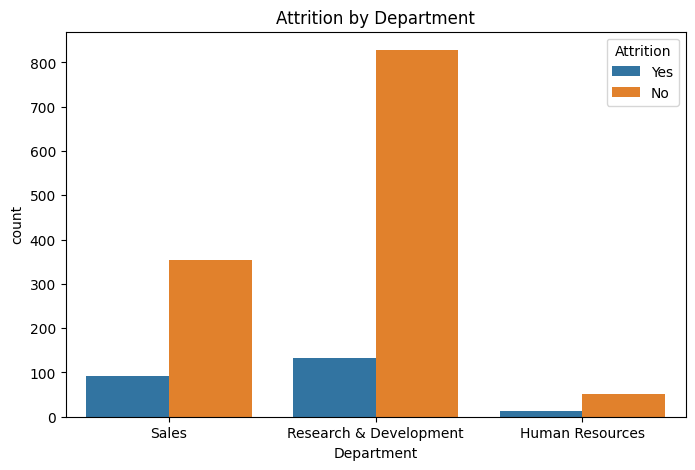

In [0]:
# Attrition by Department
df.groupBy("Department", "Attrition").count().orderBy("Department").show()

plt.figure(figsize=(8, 5))
sns.countplot(data=pdf, x="Department", hue="Attrition")
plt.title("Attrition by Department")
plt.show()

+------+---------+-----+
|Gender|Attrition|count|
+------+---------+-----+
|Female|       No|  501|
|  Male|      Yes|  150|
|  Male|       No|  732|
|Female|      Yes|   87|
+------+---------+-----+



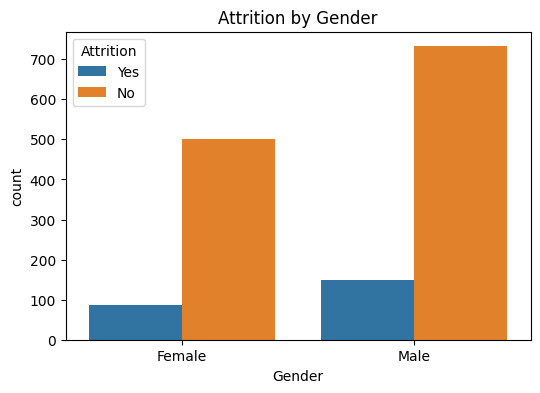

In [0]:
# Attirtion by Gender
df.groupBy("Gender", "Attrition").count().show()

plt.figure(figsize=(6, 4))
sns.countplot(data=pdf, x="Gender", hue="Attrition")
plt.title("Attrition by Gender")
plt.show()

+--------------------+---------+-----+
|             JobRole|Attrition|count|
+--------------------+---------+-----+
|Healthcare Repres...|       No|  122|
|Healthcare Repres...|      Yes|    9|
|     Human Resources|      Yes|   12|
|     Human Resources|       No|   40|
|Laboratory Techni...|       No|  197|
|Laboratory Techni...|      Yes|   62|
|             Manager|       No|   97|
|             Manager|      Yes|    5|
|Manufacturing Dir...|       No|  135|
|Manufacturing Dir...|      Yes|   10|
|   Research Director|      Yes|    2|
|   Research Director|       No|   78|
|  Research Scientist|       No|  245|
|  Research Scientist|      Yes|   47|
|     Sales Executive|       No|  269|
|     Sales Executive|      Yes|   57|
|Sales Representative|      Yes|   33|
|Sales Representative|       No|   50|
+--------------------+---------+-----+



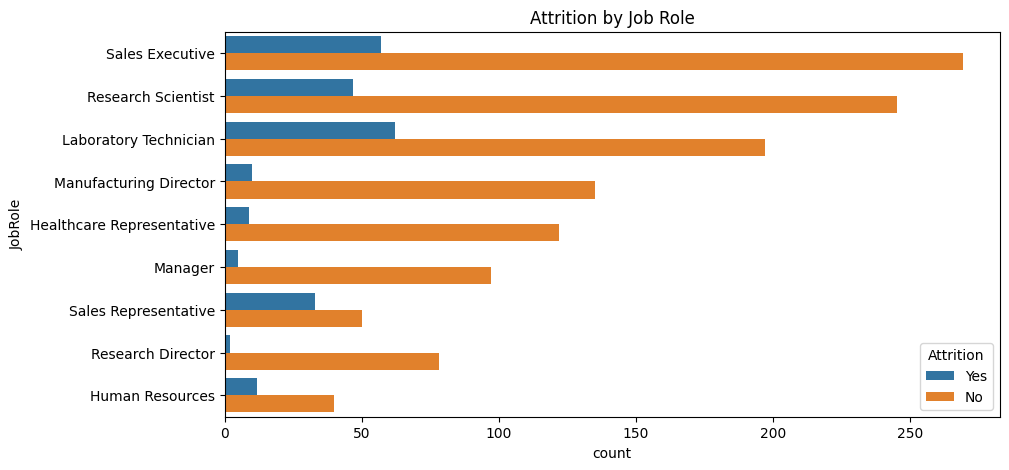

In [0]:
# Attrition by Job Role
df.groupBy("JobRole", "Attrition").count().orderBy("JobRole").show()

plt.figure(figsize=(10, 5))
sns.countplot(data=pdf, y="JobRole", hue="Attrition")
plt.title("Attrition by Job Role")
plt.show()

+---------+------------------+
|Attrition|avg(MonthlyIncome)|
+---------+------------------+
|      Yes|4787.0928270042195|
|       No| 6832.739659367397|
+---------+------------------+



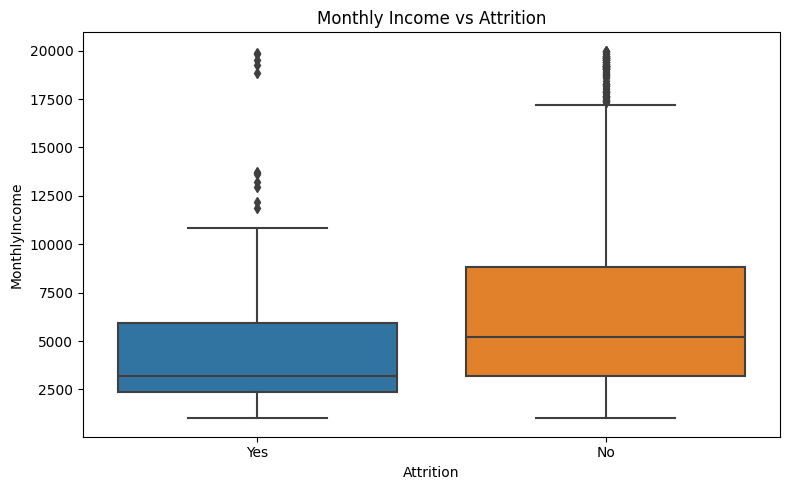

In [0]:
# Attrition by Montly Income
df.groupBy("Attrition").avg("MonthlyIncome").show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=pdf, x="Attrition", y="MonthlyIncome")
plt.title("Monthly Income vs Attrition")
plt.tight_layout()
plt.show()

+---------+--------------------+
|Attrition|avg(JobSatisfaction)|
+---------+--------------------+
|      Yes|  2.4683544303797467|
|       No|   2.778588807785888|
+---------+--------------------+



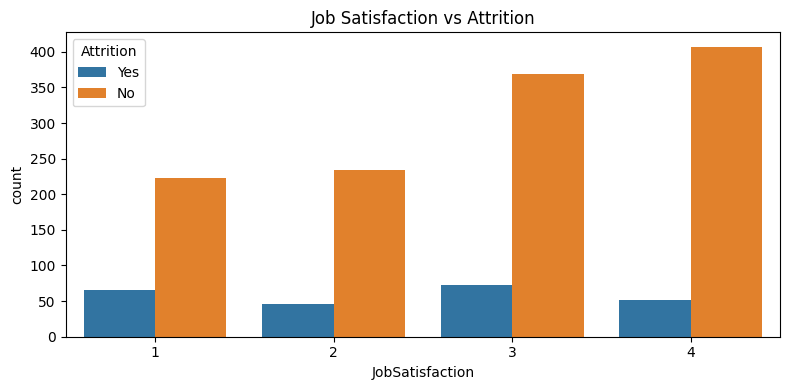

In [0]:
# Attrition vs Job Satisfaction
df.groupBy("Attrition").avg("JobSatisfaction").show()

plt.figure(figsize=(8, 4))
sns.countplot(data=pdf, x="JobSatisfaction", hue="Attrition")
plt.title("Job Satisfaction vs Attrition")
plt.tight_layout()
plt.show()

+---------------+---------+-----+
|WorkLifeBalance|Attrition|count|
+---------------+---------+-----+
|              1|      Yes|   25|
|              1|       No|   55|
|              2|      Yes|   58|
|              2|       No|  286|
|              3|      Yes|  127|
|              3|       No|  766|
|              4|       No|  126|
|              4|      Yes|   27|
+---------------+---------+-----+



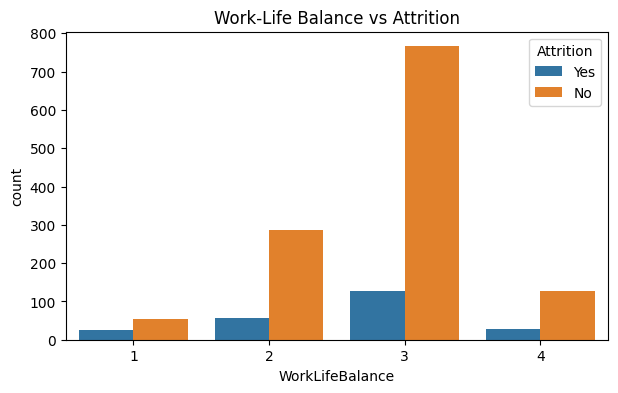

In [0]:
# Attrition vs Work Life Balance
df.groupBy("WorkLifeBalance", "Attrition").count().orderBy("WorkLifeBalance").show()

plt.figure(figsize=(7, 4))
sns.countplot(data=pdf, x="WorkLifeBalance", hue="Attrition")
plt.title("Work-Life Balance vs Attrition")
plt.show()

###  **2.2 Feature **Engineering****

In [0]:
# Age Group
from pyspark.sql.functions import when

df = df.withColumn(
    "AgeGroup",
    when((col("Age") >= 18) & (col("Age") <= 24), "18-24")
    .when((col("Age") >= 25) & (col("Age") <= 34), "25-34")
    .when((col("Age") >= 35) & (col("Age") <= 44), "35-44")
    .otherwise("45+")
)

In [0]:
# Years at Company Group
df = df.withColumn(
    "TenureBand",
    when(col("YearsAtCompany") < 2, "<2y")
    .when(col("YearsAtCompany") < 5, "2–4y")
    .when(col("YearsAtCompany") < 10, "5–9y")
    .otherwise("10y+")
    )

In [0]:
# Satisfaction Level Labels
df = df.withColumn(
    "WorkLifeBalanceLabel",
    when(col("WorkLifeBalance") == 1, "Low")
    .when(col("WorkLifeBalance") == 2, "Fair")
    .when(col("WorkLifeBalance") == 3, "Good")
    .otherwise("Excellent")
    )

df = df.withColumn(
    "JobSatisfactionLabel",
    when(col("JobSatisfaction") == 1, "Low")
    .when(col("JobSatisfaction") == 2, "Fair")
    .when(col("JobSatisfaction") == 3, "Good")
    .otherwise("Excellent")
    )

### **2.3 Relationships Between Numerical Features**

In [0]:
# Select only numerical columns
drop_cols = ["EmployeeCount", "StandardHours"]

numerical_df = pdf.select_dtypes(include=["int64", "float64"])
numerical_df = numerical_df.drop(columns=drop_cols, errors="ignore")

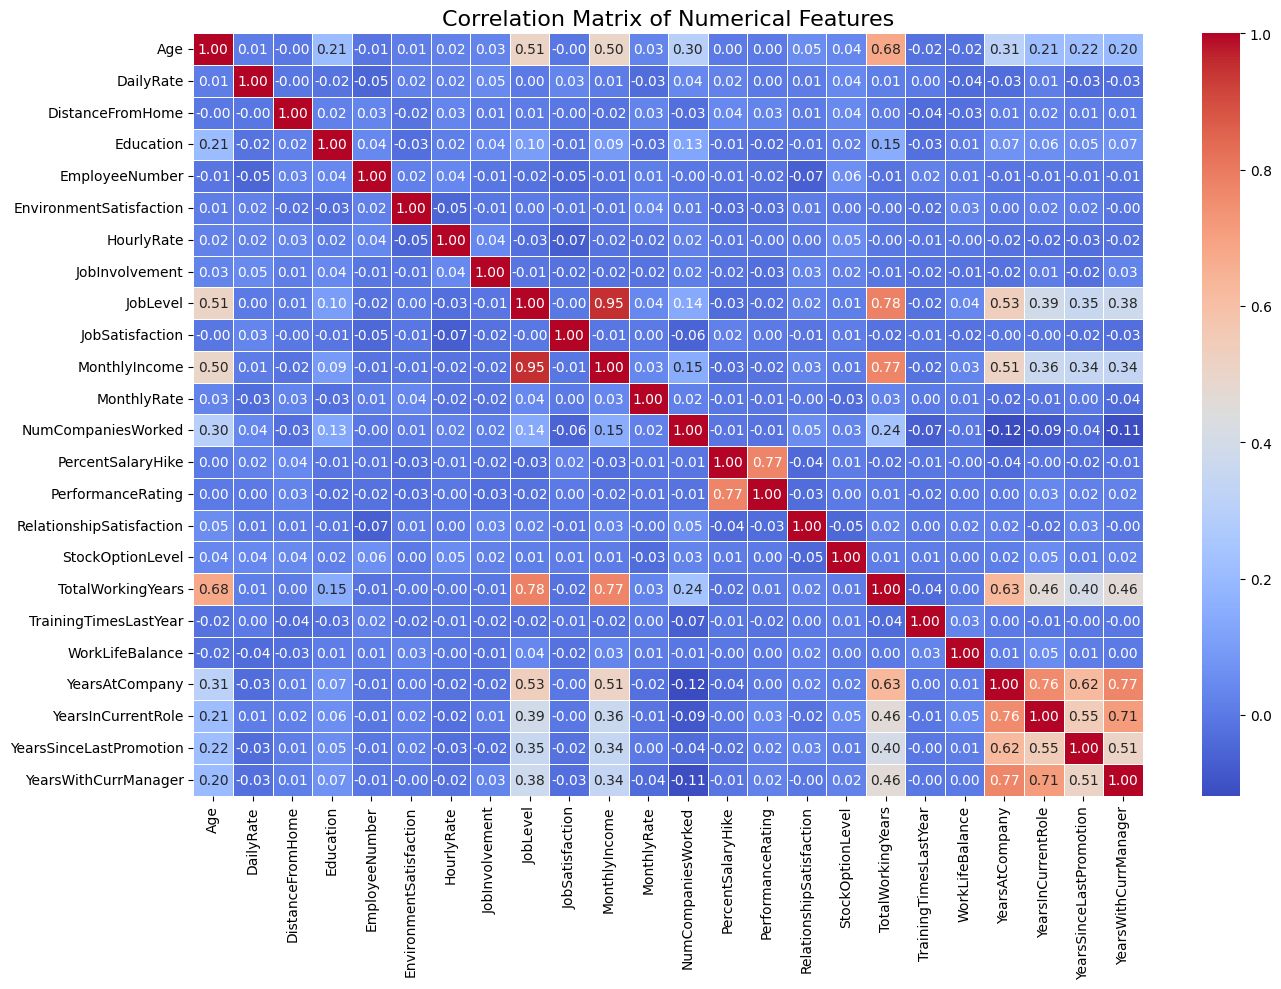

In [0]:
# Correlation Matrix
plt.figure(figsize=(14,10))
sns.heatmap(numerical_df.corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

#### **2.3.1 Numerical Features vs Attrition**

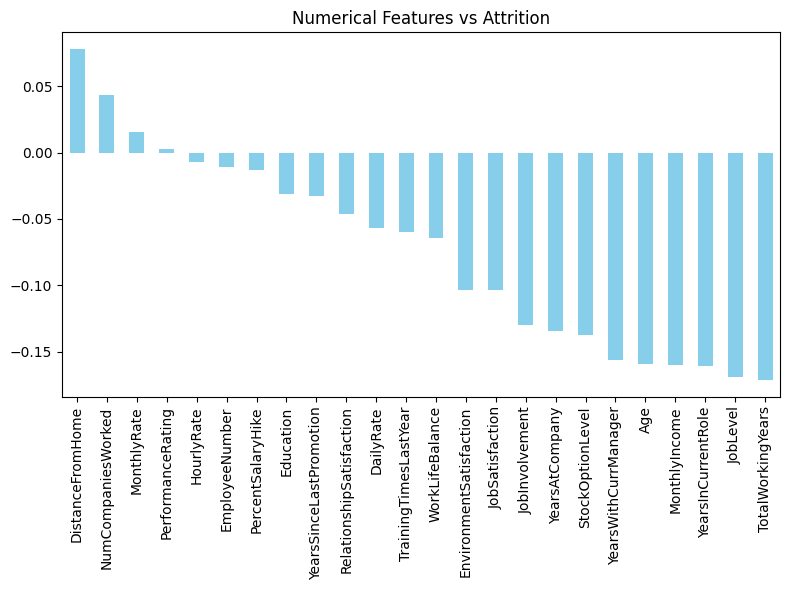

In [0]:
# Attrition feature mapping
pdf["AttritionMap"] = pdf["Attrition"].map({"Yes": 1, "No": 0})

target_cor = numerical_df.copy()
target_cor["AttritionMap"] = pdf["AttritionMap"]

correlations = target_cor.corr()["AttritionMap"].drop("AttritionMap").sort_values(ascending=False)

plt.figure(figsize=(8,6))
correlations.plot(kind="bar", color="skyblue")
plt.title("Numerical Features vs Attrition")
plt.tight_layout()
plt.show()

#### **2.3.2 Categorical Features vs Attrition**

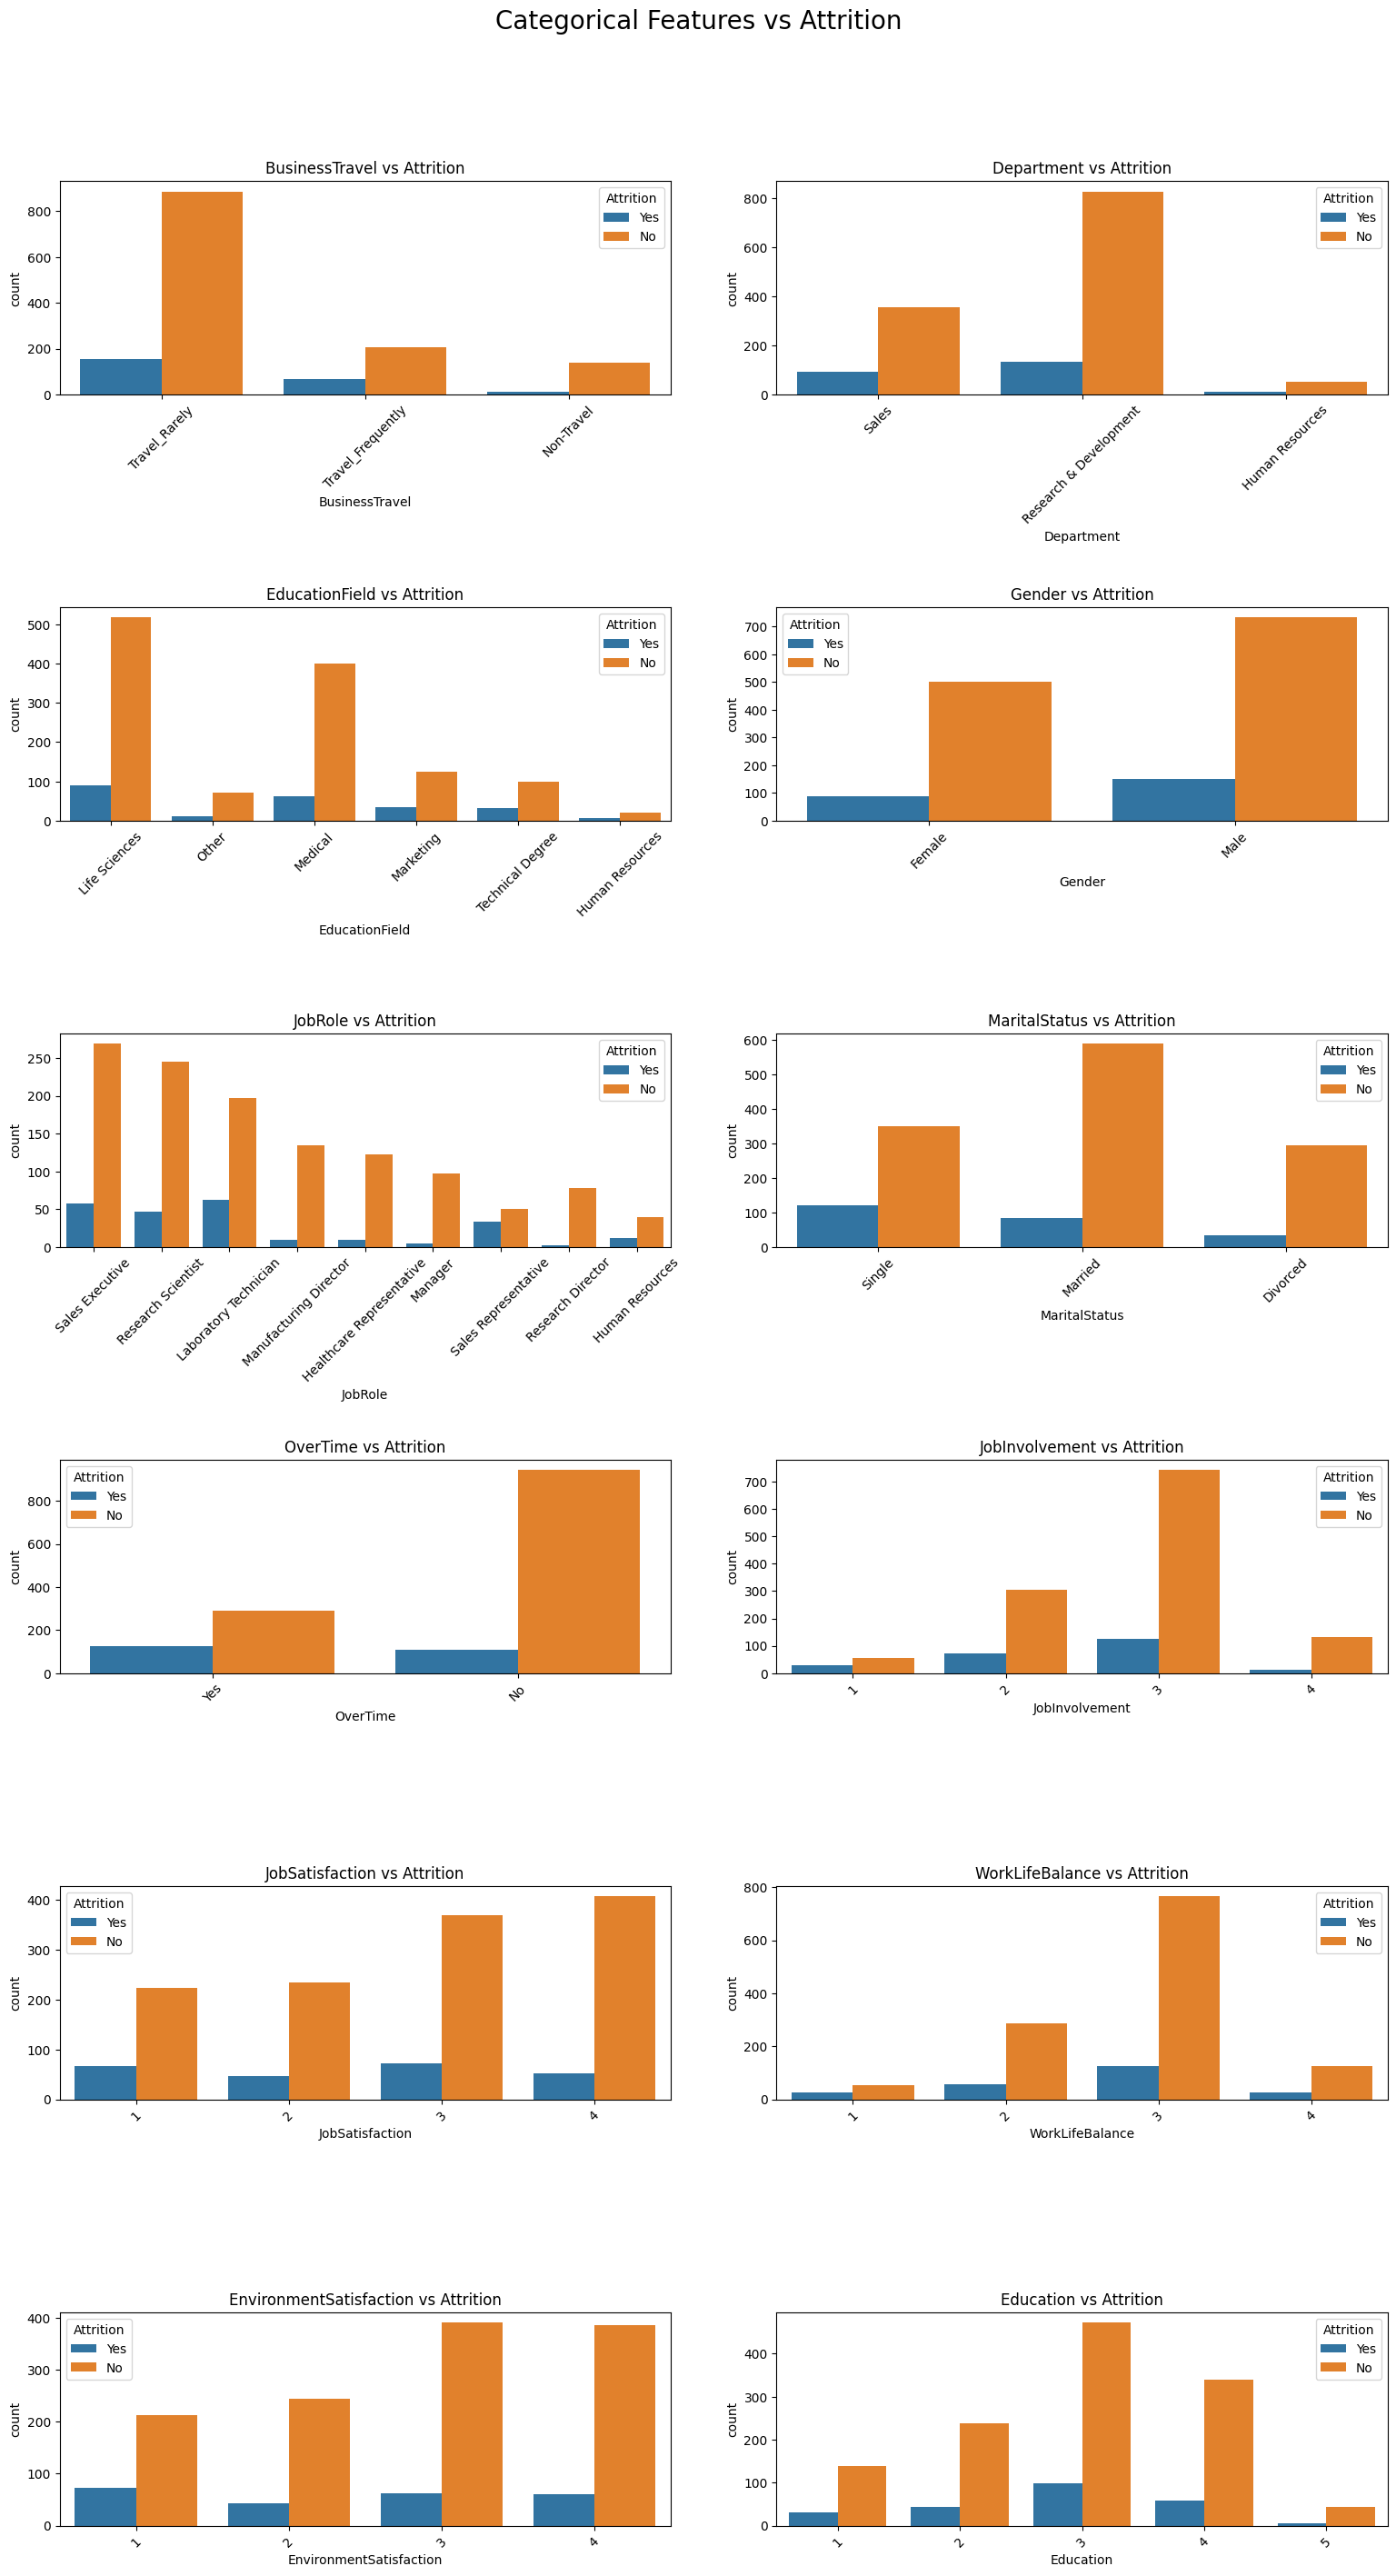

In [0]:
# Define categorical columns
categorical_cols = [
    "BusinessTravel", "Department", "EducationField", "Gender", "JobRole", 
    "MaritalStatus", "OverTime", "JobInvolvement", "JobSatisfaction", 
    "WorkLifeBalance", "EnvironmentSatisfaction", "Education"
]

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(16, 28))
fig.suptitle("Categorical Features vs Attrition", fontsize=20, y=1.02)

axes = axes.flatten()

# Plot each feature
for i, col in enumerate(categorical_cols):
    sns.countplot(data=pdf, x=col, hue="Attrition", ax=axes[i])
    axes[i].set_title(f"{col} vs Attrition", fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

# Adding space between subplots
plt.subplots_adjust(hspace=0.2, wspace=0.3)
plt.tight_layout(pad=3.0)
plt.show()